In [1]:
import pandas as pd

In [2]:
car_sales = pd.read_csv('cleanData/car_sales_clean.csv')
elevation = pd.read_csv('cleanData/elevationClean.csv')
gdp = pd.read_csv('cleanData/gdpClean.csv')
used_car = pd.read_csv('cleanData/used_car_clean.csv')
state = pd.read_csv('rawData/50_us_states_all_data (1).csv')
state.drop(state.columns[0],axis=1,inplace=True)
state.drop(state.columns[2],axis=1,inplace=True)
finalData = elevation.merge(state, how='inner', left_on='State', right_on='StateName').drop('StateName', axis=1)
finalData = finalData.merge(gdp, how='inner', left_on='State', right_on='GeoName').drop('GeoName', axis=1)
#finalData = used_car.merge(finalData, how='inner', left_on='State', right_on='StateAggre')
finalData = finalData[finalData.ComponentName == 'Gross domestic product (GDP) by state (millions of current dollars)']
finalData = finalData.drop('ComponentName', axis=1)
finalData = finalData.drop('Description', axis=1)
finalData.drop(finalData.columns[0],axis=1,inplace=True)
#used_car = used_car.merge(car_sales, how='left', left_on='Model', right_on='Model')
#for index,car in car_sales.iterrows():
   # carMake = car['Make'].strip()
    #if used_car['Make'].str.contains(carMake).any():
    #    carMakeModel = car_sales.loc[car_sales['Make'] == carMake]
    #    print('g')
    #    print(carMakeModel)
      #  pat = '|'.join(r"{}".format(x) for x in car['Make'])
     #   used_car['Test3'] = used_car['Make'].str.extract('('+ pat + ')', expand=False)
        #DF = pd.merge(DF1, DF2, left_on= 'Test1', right_on='Test3').drop('Test3', axis=1)
#finalData = finalData.groupby('StateAggre')
#finalData.sum()
finalData

,State,Highest elevation(ft),Mean elevation(ft),Elevation difference(ft),StateAggre,Unnamed: 0_y,1997,1998,1999,2000,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,2413,500,2413,AL,1,876,1410,1625,1876,...,3230,1474,3218,4420,5176,6130,6041,6727,7005,(NA)
9,Alaska,20320,1900,20320,AK,2,3,4,3,1,...,2,1,4,3,3,4,4,4,4,(NA)
18,Arizona,12637,4100,12567,AZ,3,454,480,452,446,...,357,176,236,339,474,470,534,603,756,(NA)
27,Arkansas,2753,650,2698,AR,4,658,621,688,734,...,488,197,411,568,442,432,461,592,561,(NA)
36,California,14505,2900,14776,CA,5,3535,3717,4214,4360,...,3936,2773,2554,2523,2434,2615,3744,5155,5908,(NA)
45,Colorado,14440,6800,11125,CO,6,178,168,195,237,...,103,50,71,86,79,71,90,121,118,(NA)
54,Connecticut,2380,500,2380,CT,7,470,521,522,545,...,367,171,343,421,427,468,499,556,514,(NA)
63,Delaware,448,60,448,DE,8,236,460,491,424,...,111,42,31,26,7,8,9,10,12,(NA)
72,Florida,345,100,345,FL,10,495,540,551,602,...,430,227,415,560,516,604,678,708,763,(NA)
81,Georgia,4784,600,4784,GA,11,2644,2586,3202,2787,...,1361,554,1301,1922,2335,2452,2717,2845,3042,(NA)


In [3]:
#Select target state
used_car['State'] = used_car['State'].str.upper()
used_carGrouped = used_car.groupby('State')
used_carGrouped.size().sort_values(ascending=False)

State
 TX    41589
 CA    34421
 FL    32165
 GA    16611
 IL    16354
 NC    15734
 VA    14705
 PA    12160
 NJ    11544
 NY    11451
 OH    10185
 WA     9902
 AZ     9841
 CO     9815
 TN     8225
 MA     7876
 MD     7689
 IN     7105
 MO     6857
 KY     6050
 AL     5469
 WI     4879
 MN     4712
 MI     4554
 UT     4450
 OK     4382
 OR     4382
 CT     4382
 SC     4281
 LA     3444
 KS     3204
 NV     3151
 AR     2801
 MS     2674
 NH     2471
 NE     2189
 NM     2040
 IA     2023
 ID     1473
 HI     1093
 DE     1079
 ME      797
 RI      786
 MT      745
 AK      693
 WV      601
 ND      572
 SD      510
 VT      457
 WY      295
 DC        7
dtype: int64

In [6]:
WAUsedCar = used_car[used_car['State'].str.contains('WA')]
WAUsedCar['City'] = WAUsedCar['City'].str.upper()
WAUsedCarGrouped = WAUsedCar.groupby('City')
WAUsedCarGrouped.size().sort_values(ascending=False)

C:\Users\zyj97\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


City
PUYALLUP          1195
TACOMA            1063
SEATTLE            676
BELLEVUE           566
SPOKANE            499
LYNNWOOD           450
EVERETT            410
LAKEWOOD           350
OLYMPIA            341
AUBURN             316
RENTON             308
KIRKLAND           278
BREMERTON          260
BELLINGHAM         252
EDMONDS            226
VANCOUVER          207
BURIEN             166
SHORELINE          149
SPOKANE VALLEY     146
MARYSVILLE         133
FIFE               129
CHEHALIS           124
FEDERAL WAY        110
TURNWATER          103
KENNEWICK           99
BURLINGTON          95
MOUNT VERNON        82
PORT ORCHARD        81
ISSAQUAH            80
YAKIMA              73
SUMNER              73
WOODINVILLE         61
LONGVIEW            56
WALLA WALLA         53
TUKWILA             52
WENATCHEE           49
COLVILLE            48
ELLENSBURG          46
LIBERTY LAKE        45
EAST WENATCHEE      42
MONROE              40
MCKENNA             39
BOTHELL             38
WASHOU

In [7]:
searchFor = ['SEATTLE', 'TACOMA','BELLEVUE']
bigSeattleUsedCar = WAUsedCar[WAUsedCar.City.str.contains('|'.join(searchFor))]

In [12]:
bigSeattleUsedCar
bigSeattleUsedCar.groupby(['Make','Model']).size().sort_values(ascending=False)

Make           Model            
BMW            3                    50
Chevrolet      Silverado            39
Honda          Accord               29
Lexus          RX                   28
Honda          Civic                26
Ford           F-1504WD             24
Volkswagen     Jetta                24
Jeep           Grand                22
Mercedes-Benz  C-ClassC             21
Land           Rover                21
MINI           Cooper               19
GMC            Sierra               18
Nissan         Altima2.5            18
Dodge          Ram                  16
Jeep           Wrangler             15
Lexus          ES                   15
BMW            i3Hatchback          15
               5                    15
Lexus          IS                   14
Ford           Super                14
BMW            4                    14
Ford           FocusHatchback       13
Volkswagen     Golf                 13
Mazda          Mazda3i              13
Chrysler       Town            

In [10]:
car_sales

,Unnamed: 0,Make,Model,Sales,4-year resale value,Price
0,0,Acura,Integra,16919,16360,21500
1,1,Acura,TL,39384,19875,28400
2,2,Acura,RL,8588,29725,42000
3,3,Audi,A4,20397,22255,23990
4,4,Audi,A6,18780,23555,33950
5,5,Audi,A8,1380,39000,62000
6,6,BMW,328i,9231,28675,33400
7,7,BMW,528i,17527,36125,38900
8,8,Buick,Century,91561,12475,21975
9,9,Buick,Regal,39350,13740,25300


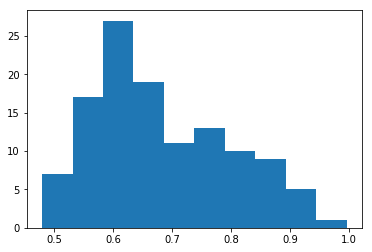

In [13]:
&car_sales['depreciationRate'] = car_sales['4-year resale value']/car_sales['Price']
import matplotlib.pyplot as plt
plt.figure()
plt.hist(car_sales['depreciationRate'])
plt.show()

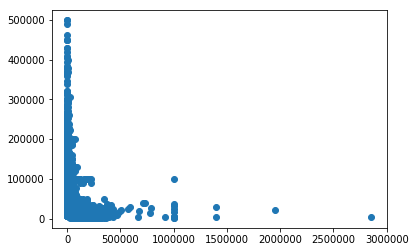

In [27]:
plt.figure()
plt.scatter(used_car['Mileage'],used_car['Price'])
plt.show()

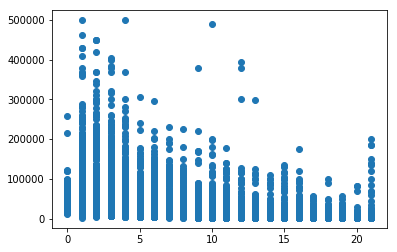

In [29]:
plt.figure()
plt.scatter(2018-used_car['Year'],used_car['Price'])
plt.show()